In [3]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn

import time
from pickle import load

import math
import os
from matplotlib.ticker import MultipleLocator
import matplotlib
from scipy.stats import iqr

In [4]:
k = 8
J = 32

# Load data #

## Non climate change data ##

In [88]:
truth_set_f_20 = np.load("../../data/truth_run/f_20_all.npy")

# truth_set_f_21 = np.load("../../data/truth_run/climate_change_exp/full_val_21_5_set.npy")[:,:,0] ##21.5


## Climate change ##

In [6]:
truth_set_full  = np.load("../../data/truth_run/climate_change_exp/full_28_set.npy")[:,:,0]


In [7]:

gan_full_f_28 = (np.load("../../data/simulation_runs/gan_gagne/corrected_gans/new_generated_data_28.npy")).transpose([1,0])

In [8]:

rnn_full_28 =(np.load("../../data/simulation_runs/rnn/rnn_final/clim_change/f_28_all.npy"))

# X_{k,t} marginal distribution # 

In [9]:
iqr_data = iqr(np.ravel(truth_set_full))
bin_width = (2 * iqr_data)/(np.ravel(truth_set_full).shape[0])**(1/3)

number_bins = int(35--30/bin_width)
number_bins

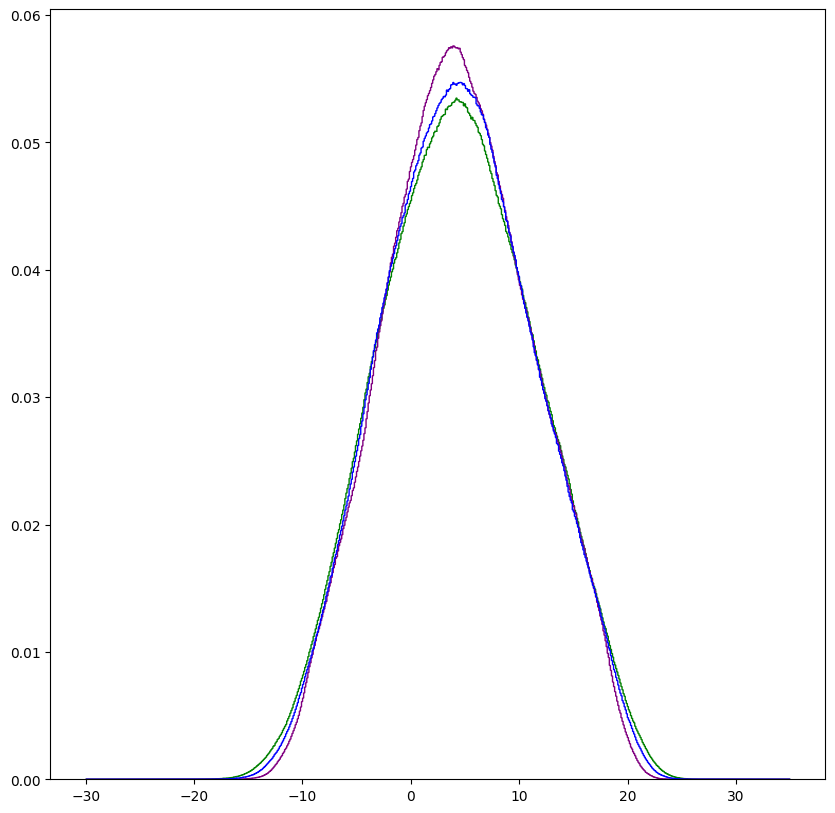

In [12]:
fig,ax = plt.subplots(figsize=(10,10))
bin_seq = np.linspace(-30,35,number_bins)
ax.hist(np.ravel(truth_set_full),bins=bin_seq,histtype="step",density=True,color="green")
ax.hist(np.ravel(gan_full_f_28),bins=bin_seq,histtype="step",color="purple",density=True)
ax.hist(np.ravel(rnn_full_28),bins=bin_seq,histtype="step",color="blue",density=True)

plt.show()

In [13]:
fig,ax = plt.subplots(figsize=(10,10))
truth,_,_ = ax.hist(np.ravel(truth_set_full),bins=bin_seq,histtype="step",density=True,color="green")
gan,_,_ = ax.hist(np.ravel(gan_full_f_28),bins=bin_seq,histtype="step",color="purple",density=True)
rnn,_,_ = ax.hist(np.ravel(rnn_full_28),bins=bin_seq,histtype="step",color="blue",density=True)

plt.close()

In [14]:
#deal with numerical stuff due to y_true containing zero
truth = truth + 1e-10
rnn = rnn + 1e-10
gan = gan + 1e-10



In [15]:
#kl between rnn and true
np.sum(np.log(truth/rnn)*truth)


0.02125742674457482

In [16]:
#kl between gan and true
np.sum(np.log(truth/gan)*truth)


0.13728999131940078

# Principal Component analysis #

In [17]:
#PCA / EOF analysis
from sklearn.decomposition import PCA

In [18]:
#smoothing data temporally
from scipy.ndimage import uniform_filter1d

In [19]:
smoothed_data = uniform_filter1d(truth_set_full,size=80,axis=0)

In [86]:
smoothed_data_f_20 = uniform_filter1d(truth_set_f_20,size=80,axis=0)
smoothed_data_f_21 = uniform_filter1d(truth_set_f_21,size=80,axis=0)

NameError: name 'truth_set_f_21' is not defined

In [21]:
pca_smooth = PCA(n_components=4)

In [22]:
pca_data_smooth_f_20 = pca_smooth.fit_transform(smoothed_data_f_20) #get the original pca components

In [23]:
pca_data_smooth_f_21 = pca_smooth.transform(smoothed_data_f_21) #get the original pca components

NameError: name 'smoothed_data_f_21' is not defined

In [24]:
pca_data_smooth_f_28 = pca_smooth.transform(smoothed_data) #for the f 28 test data

In [25]:
dim1 = (pca_data_smooth_f_28[:,0]**2 + pca_data_smooth_f_28[:,1]**2)**0.5
dim2 = (pca_data_smooth_f_28[:,2]**2 + pca_data_smooth_f_28[:,3]**2)**0.5
# dim1_f21 = (pca_data_smooth_f_21[:,0]**2 + pca_data_smooth_f_21[:,1]**2)**0.5
# dim2_f21 = (pca_data_smooth_f_21[:,2]**2 + pca_data_smooth_f_21[:,3]**2)**0.5

In [26]:
def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.
    
        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.
    """
    if type(cmap) == str:
        cmap = get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki, key in enumerate(('red','green','blue')):
        cdict[key] = [(indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki]) for i in range(N+1)]
    # Return colormap object.
    return matplotlib.colors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

In [27]:
discretized_jet = cmap_discretize(matplotlib.cm.jet, 20)


In [28]:
discretized_mono = cmap_discretize(matplotlib.cm.binary, 20)
discretized_div = cmap_discretize(matplotlib.cm.RdBu, 20)

In [51]:
iqr_data = iqr(np.ravel(dim2))
bin_width = (2 * iqr_data)/(np.ravel(dim2).shape[0])**(1/3)

number_bins = int(10/bin_width)
number_bins

277

In [52]:
density,xedges,yedges,d = plt.hist2d(x=dim1,y=dim2,bins=number_bins,cmap=discretized_jet,density=True,vmax=0.04,range=[[0,15],[0,10]])
# density_21,xedges,yedges,d = plt.hist2d(x=dim1_f21,y=dim2_f21,bins=100,cmap=discretized_jet,density=True,vmax=0.04,range=[[0,15],[0,10]])
plt.close()

In [37]:
X,Y=np.meshgrid(xedges,yedges)

In [38]:
diff_density = density.T - density_21.T

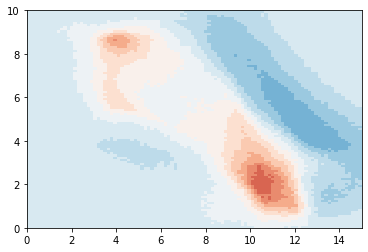

In [39]:
#this is the plot

plt.pcolormesh(X,Y,diff_density,cmap=discretized_div,vmin=-0.05,vmax=0.04)


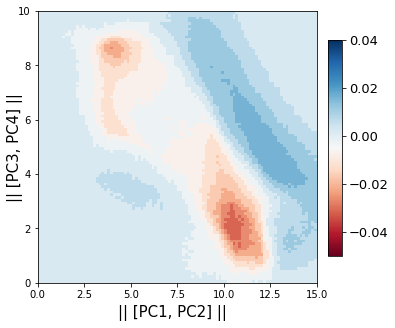

In [40]:
#recreating fig 7b / 8a
fig,ax = plt.subplots(figsize=(5,5))
plt.rcParams['font.size'] = '13'

ax.pcolormesh(X,Y,diff_density,cmap=discretized_div,vmin=-0.05,vmax=0.04)
#ax.text(-0.1,10.7,"(a) Truth",fontsize=15,va="top")


norm = matplotlib.colors.Normalize(vmin=-0.05,vmax=0.04)
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])
cax = fig.add_axes([0.93,0.2,0.04,0.6])
fig.colorbar(sm, ticks=[-0.04,-0.02,0,0.02,0.04],cax=cax)

fig.text(0.5, 0.03, '|| [PC1, PC2] ||', ha='center', fontsize="15")
fig.text(0.04, 0.5, '|| [PC3, PC4] ||', va='center', rotation='vertical',fontsize="15")

# plt.savefig("clim_change_diff.pdf",bbox_inches="tight")


plt.show()

### Comparing across models ###

In [24]:
# #poly (with already trained pca components)
# smoothed_data_poly_f_23 = uniform_filter1d(polynomial_data[:,:],size=80,axis=0)
# smoothed_data_poly_f_20 = uniform_filter1d(polynomial_data_f_20[:,:],size=80,axis=0)

# pca_data_poly_20 = pca_smooth.transform(smoothed_data_poly_f_20)
# pca_data_poly_23 = pca_smooth.transform(smoothed_data_poly_f_23)


# dim1_poly_20 = (pca_data_poly_20[:,0]**2 + pca_data_poly_20[:,1]**2)**0.5
# dim2_poly_20 = (pca_data_poly_20[:,2]**2 + pca_data_poly_20[:,3]**2)**0.5

# dim1_poly_23 = (pca_data_poly_23[:,0]**2 + pca_data_poly_23[:,1]**2)**0.5
# dim2_poly_23 = (pca_data_poly_23[:,2]**2 + pca_data_poly_23[:,3]**2)**0.5

# density_23_poly,xedges,yedges,d = plt.hist2d(x=dim1_poly_23,y=dim2_poly_23,bins=100,cmap=discretized_jet,density=True,vmax=0.04,range=[[0,15],[0,10]])
# density_20_poly,xedges,yedges,d = plt.hist2d(x=dim1_poly_20,y=dim2_poly_20,bins=100,cmap=discretized_jet,density=True,vmax=0.04,range=[[0,15],[0,10]])
# plt.close()

# diff_density_poly = density_23_poly.T - density_20_poly.T


# plt.pcolormesh(X,Y,diff_density_poly,cmap=discretized_jet,vmin=-0.05,vmax=0.04)


In [50]:
iqr_data = iqr(np.ravel(dim2))
bin_width = (2 * iqr_data)/(np.ravel(dim2).shape[0])**(1/3)

number_bins = int(10/bin_width)
number_bins

277

In [53]:
#rnn
smoothed_data_rnn_f_28 = uniform_filter1d(rnn_full_28[:,:],size=80,axis=0)

pca_data_smooth_rnn_28 = pca_smooth.transform(smoothed_data_rnn_f_28)

dim1_rnn_28 = (pca_data_smooth_rnn_28[:,0]**2 + pca_data_smooth_rnn_28[:,1]**2)**0.5
dim2_rnn_28 = (pca_data_smooth_rnn_28[:,2]**2 + pca_data_smooth_rnn_28[:,3]**2)**0.5

In [54]:
density_28_rnn,xedges,yedges,d = plt.hist2d(x=dim1_rnn_28,y=dim2_rnn_28,bins=number_bins,cmap=discretized_jet,density=True,vmax=0.04,range=[[0,15],[0,10]])
plt.close()

In [55]:
#gan (with already trained pca components)

smoothed_data_gan_f_28 = uniform_filter1d(gan_full_f_28[:,:],size=80,axis=0)

pca_data_gan_28 = pca_smooth.transform(smoothed_data_gan_f_28)

dim1_gan_28 = (pca_data_gan_28[:,0]**2 + pca_data_gan_28[:,1]**2)**0.5
dim2_gan_28 = (pca_data_gan_28[:,2]**2 + pca_data_gan_28[:,3]**2)**0.5

In [56]:
density_28_gan,xedges,yedges,d = plt.hist2d(x=dim1_gan_28,y=dim2_gan_28,bins=number_bins,cmap=discretized_jet,density=True,vmax=0.04,range=[[0,15],[0,10]])
plt.close()

In [57]:
density_gan_kl = density_28_gan+ 1e-10
density_rnn_kl = density_28_rnn+ 1e-10
density_true_kl = density+ 1e-10


In [58]:
#kl between rnn and true
np.sum(np.log(density_true_kl/density_rnn_kl)*density_true_kl)


10.58181920890653

In [59]:
#kl between gan and true
np.sum(np.log(density_true_kl/density_gan_kl)*density_true_kl)


57.484156624222244

In [60]:
import matplotlib as mpl


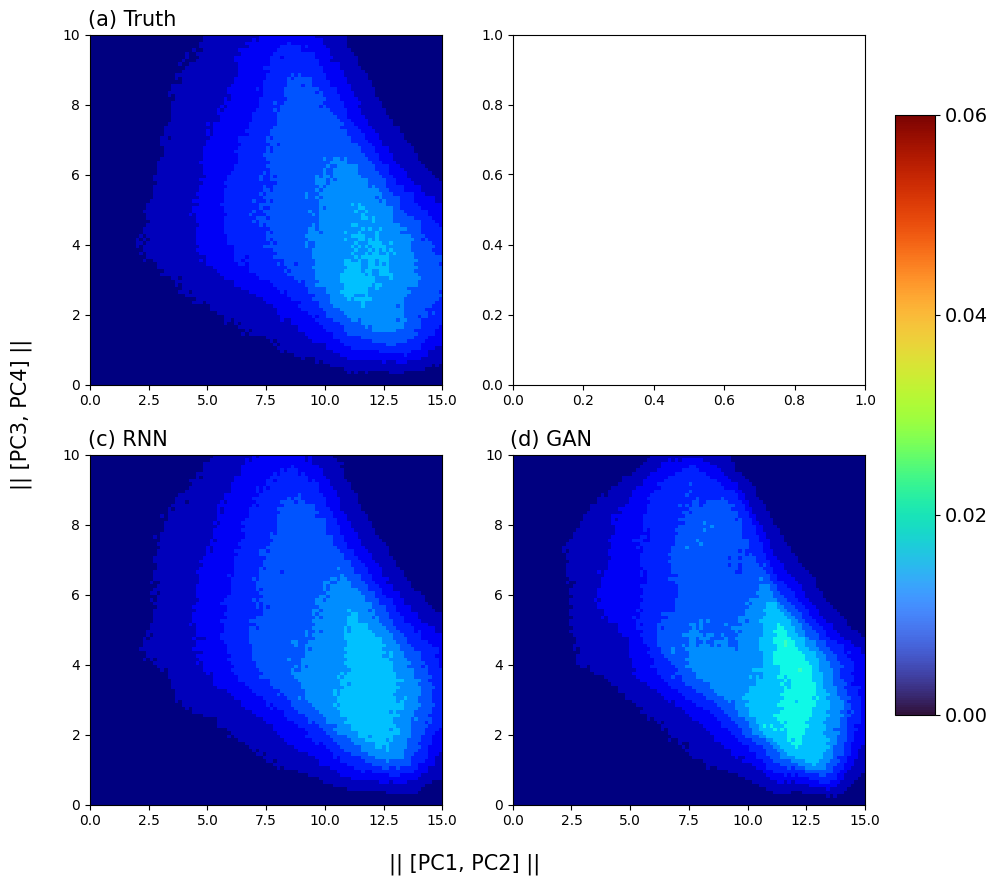

In [48]:
#recreating fig 7b / 8a
fig,ax = plt.subplots(figsize=(10,10),nrows=2,ncols=2)

plt.rcParams['font.size'] = '14'

ax[0,0].hist2d(x=dim1,y=dim2,bins=100,cmap=discretized_jet,density=True,vmax=0.06,range=[[0,15],[0,10]])
ax[0,0].text(-0.1,10.7,"(a) Truth",fontsize=15,va="top")

# ax[0,1].hist2d(x=dim1_poly_23,y=dim2_poly_23,bins=100,cmap=discretized_jet,density=True,vmax=0.06,range=[[0,15],[0,10]])
# ax[0,1].text(-0.1,10.7,"(b) Polynomial",fontsize=15,va="top")


ax[1,0].hist2d(x=dim1_rnn_28,y=dim2_rnn_28,bins=100,cmap=discretized_jet,density=True,vmax=0.06,range=[[0,15],[0,10]])
ax[1,0].text(-0.1,10.7,"(c) RNN",fontsize=15,va="top")


ax[1,1].hist2d(x=dim1_gan_28,y=dim2_gan_28,bins=100,cmap=discretized_jet,density=True,vmax=0.06,range=[[0,15],[0,10]])
ax[1,1].text(-0.1,10.7,"(d) GAN",fontsize=15,va="top")



norm = mpl.colors.Normalize(vmin=0,vmax=0.06)
sm = plt.cm.ScalarMappable(cmap="turbo", norm=norm)
sm.set_array([])
cax = fig.add_axes([0.93,0.2,0.04,0.6])
fig.colorbar(sm, ticks=[0,0.02,0.04,0.06,0.08],cax=cax)

fig.text(0.5, 0.045, '|| [PC1, PC2] ||', ha='center', fontsize="15")
fig.text(0.045, 0.5, '|| [PC3, PC4] ||', va='center', rotation='vertical',fontsize="15")

# plt.savefig("regime_plots_clim_change.pdf",bbox_inches="tight")


plt.show()

In [65]:
from matplotlib.lines import Line2D
legend_elements = [Line2D([0],[0],color="#4daf4a",lw=3,label="Truth"),
                    
                  Line2D([0],[0],color="#377eb8",lw=2,label="L96-RNN"),
                  Line2D([0],[0],color="#984ea3",lw=2,label="GAN")]

In [72]:
iqr_data = iqr(np.ravel(dim1))
bin_width = (2 * iqr_data)/(np.ravel(dim1).shape[0])**(1/3)

number_bins = int(22/bin_width)
print(number_bins)

iqr_data = iqr(np.ravel(dim2))
bin_width = (2 * iqr_data)/(np.ravel(dim2).shape[0])**(1/3)

number_bins_2 = int(16/bin_width)
print(number_bins_2)

479
444


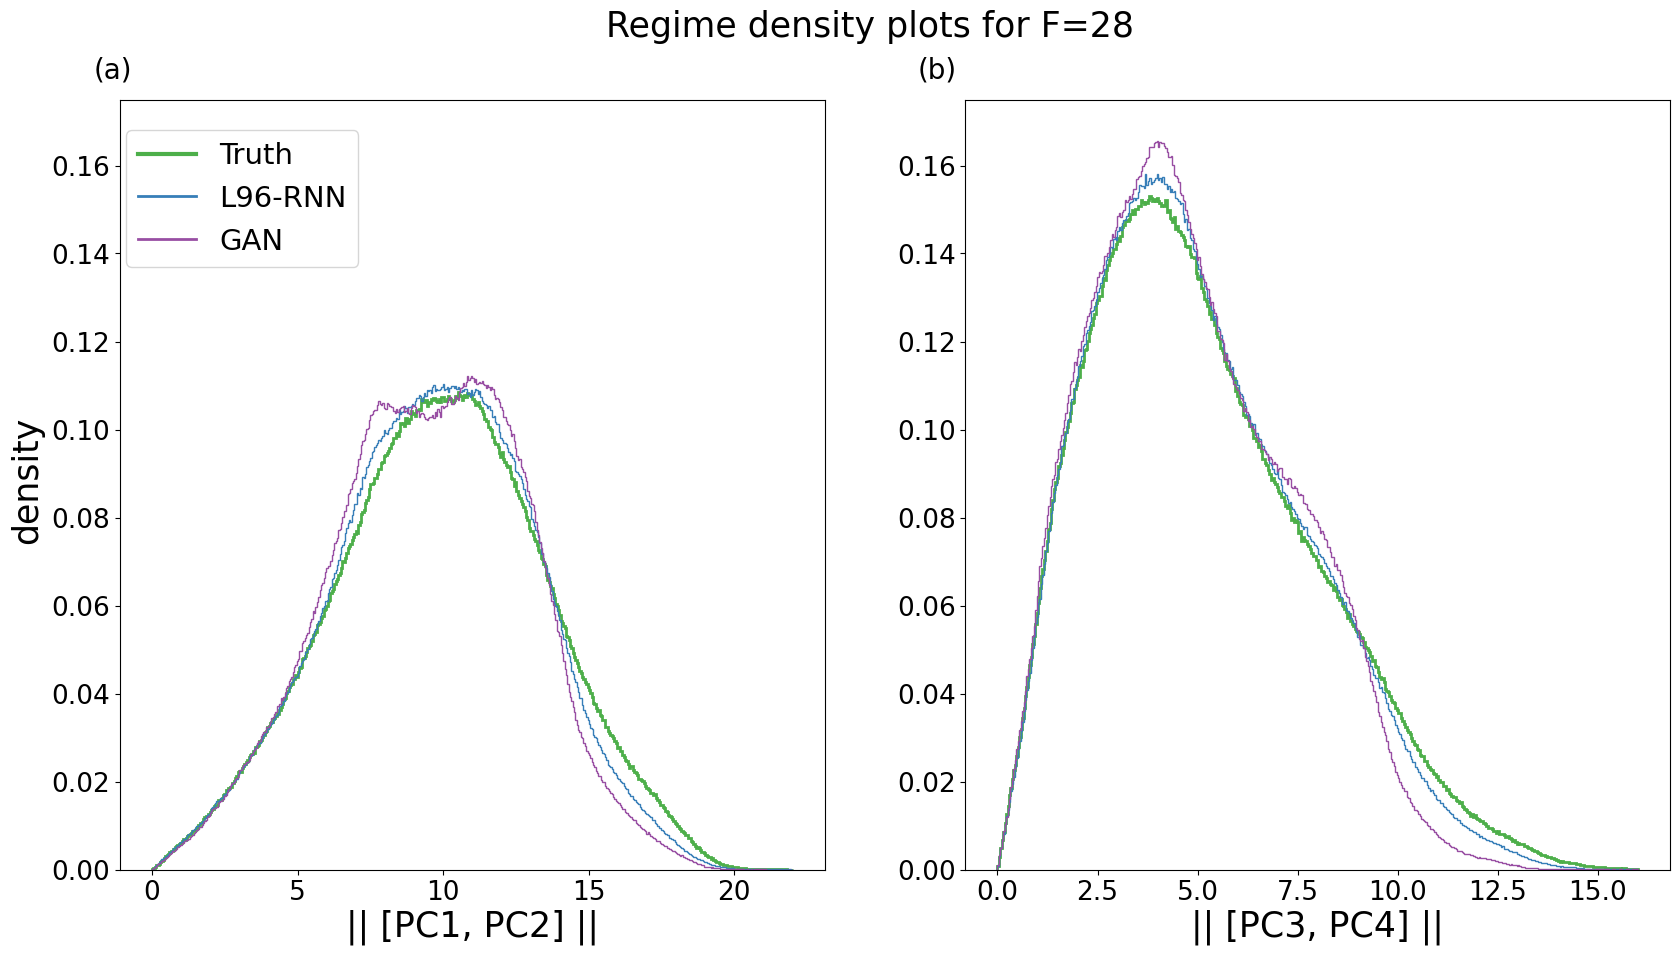

In [85]:
#joint figure of two regimes

bin_seq = np.linspace(0,22,number_bins)
bin_seq2 = np.linspace(0,16,number_bins_2)



plt.rcParams['font.size'] = '19'

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,10))

fig.suptitle("Regime density plots for F=28", size=25,y=0.97)


ax[0].hist(np.ravel(dim1),bins=bin_seq,color="#4daf4a",density=True,histtype="step",linewidth=2)
ax[0].hist(np.ravel(dim1_rnn_28[:]),bins=bin_seq,color="#377eb8",density=True,histtype="step")
ax[0].hist(np.ravel(dim1_gan_28[:]),bins=bin_seq,color="#984ea3",density=True,histtype="step")

ax[1].hist(np.ravel(dim2[:]),bins=bin_seq2,color="#4daf4a",density=True,histtype="step",linewidth=2)
ax[1].hist(np.ravel(dim2_rnn_28[:]),bins=bin_seq2,color="#377eb8",density=True,histtype="step")
ax[1].hist(np.ravel(dim2_gan_28[:]),bins=bin_seq2,color="#984ea3",density=True,histtype="step")



ax[0].text(11, -0.015, '|| [PC1, PC2] ||', ha='center', fontsize="25")
ax[1].text(8, -0.015, '|| [PC3, PC4] ||', ha='center', fontsize="25")

ax[0].text(-2,0.185,"(a)",fontsize=20,va="top")
ax[1].text(-2,0.185,"(b)",fontsize=20,va="top")

fig.legend(handles=legend_elements,loc=(0.075,0.72),prop={"size":21})

fig.text(0.07, 0.5, 'density', va='center', rotation='vertical',fontsize="25")

# ax[0].set_xlim([0,20])
ax[0].set_ylim([0,0.175])

# ax[1].set_xlim([0,13])
ax[1].set_ylim([0,0.175])

plt.savefig("clim_change_regime_hists.pdf",bbox_inches="tight")




plt.show()







In [76]:
fig,ax = plt.subplots()
bin_seq = np.linspace(0,22,number_bins)

y_true,_,_ = ax.hist(np.ravel(dim1),bins=bin_seq,color="grey",density=True,histtype="step")
y_rnn,_,_ = ax.hist(np.ravel(dim1_rnn_28),bins=bin_seq,color="blue",density=True,histtype="step")
y_gan,_,_ = ax.hist(np.ravel(dim1_gan_28),bins=bin_seq,color="purple",density=True,histtype="step")
plt.close()


In [77]:
#deal with numerical stuff due to y_true containing zero
y_true = y_true + 1e-10
y_rnn = y_rnn + 1e-10
y_gan = y_gan + 1e-10



In [78]:
#kl between rnn and true
np.sum(np.log(y_true/y_rnn)*y_true)


0.13433836263077348

In [79]:
#kl between gan and true
np.sum(np.log(y_true/y_gan)*y_true)



0.5292516422528273

In [80]:
fig,ax = plt.subplots()
bin_seq2 = np.linspace(0,16,number_bins_2)


y_true2,_,_ = ax.hist(np.ravel(dim2),bins=bin_seq2,color="grey",density=True,histtype="step")
y_rnn2,_,_ = ax.hist(np.ravel(dim2_rnn_28),bins=bin_seq2,color="blue",density=True,histtype="step")
y_gan2,_,_ = ax.hist(np.ravel(dim2_gan_28),bins=bin_seq2,color="blue",density=True,histtype="step")

plt.close()

In [81]:
#deal with numerical stuff due to y_true containing zero
y_true2 = y_true2 + 1e-10
y_rnn2 = y_rnn2 + 1e-10
y_gan2= y_gan2 + 1e-10

In [82]:
#kl between rnn and true
np.sum(np.log(y_true2/y_rnn2)*y_true2)


0.1099406497386623

In [83]:
#kl between gan and true
np.sum(np.log(y_true2/y_gan2)*y_true2)


1.0913811059450091